In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
data=pd.read_csv('/Users/jmb/Desktop/FORMATION ML/diabetes.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8d5a50>,
      dtype=object)

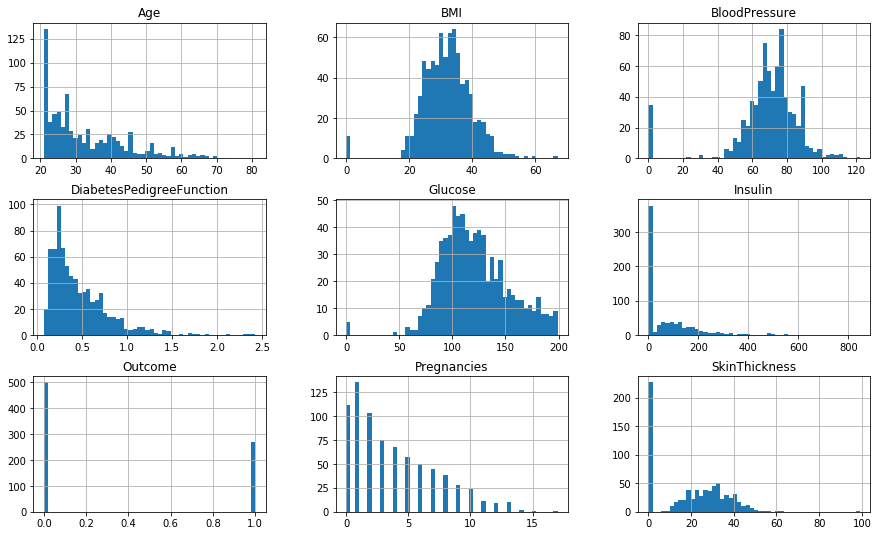

In [22]:
data.hist(figsize=(15,9),bins=50)

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
X=data.iloc[:,:-1] #toutes les colonnes sauf la dernière

In [26]:
y=data.iloc[:,-1] #toutes les lignes et seulement la dernière colonne

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=7,stratify=y) 
#on coupe en un train set eun un test set avec une stratification basée sur la target y car il y a un déséquilibre
#entre les 0 et les 1 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [32]:
model.fit(Xtrain,ytrain)

/Users/jmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.score(Xtrain,ytrain)

0.7719869706840391

In [34]:
model.score(Xtest,ytest)

0.7467532467532467

In [35]:
ypred=model.predict(Xtest)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(ytest,ypred)

0.7467532467532467

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(ytest,ypred,labels=[0,1])

array([[88, 12],
       [27, 27]])

In [40]:
ypred_proba=model.predict_proba(Xtest)

In [41]:
ypred_proba

array([[0.87108531, 0.12891469],
       [0.83996253, 0.16003747],
       [0.818227  , 0.181773  ],
       [0.73972891, 0.26027109],
       [0.80392519, 0.19607481],
       [0.97660614, 0.02339386],
       [0.91417663, 0.08582337],
       [0.69097081, 0.30902919],
       [0.84736513, 0.15263487],
       [0.42466997, 0.57533003],
       [0.80530122, 0.19469878],
       [0.45495975, 0.54504025],
       [0.76043614, 0.23956386],
       [0.78347664, 0.21652336],
       [0.26622296, 0.73377704],
       [0.92885509, 0.07114491],
       [0.48232073, 0.51767927],
       [0.76434088, 0.23565912],
       [0.72847624, 0.27152376],
       [0.97183679, 0.02816321],
       [0.3836925 , 0.6163075 ],
       [0.37869444, 0.62130556],
       [0.69899879, 0.30100121],
       [0.63857088, 0.36142912],
       [0.26276848, 0.73723152],
       [0.68875876, 0.31124124],
       [0.69870956, 0.30129044],
       [0.90452584, 0.09547416],
       [0.82251049, 0.17748951],
       [0.20756573, 0.79243427],
       [0.

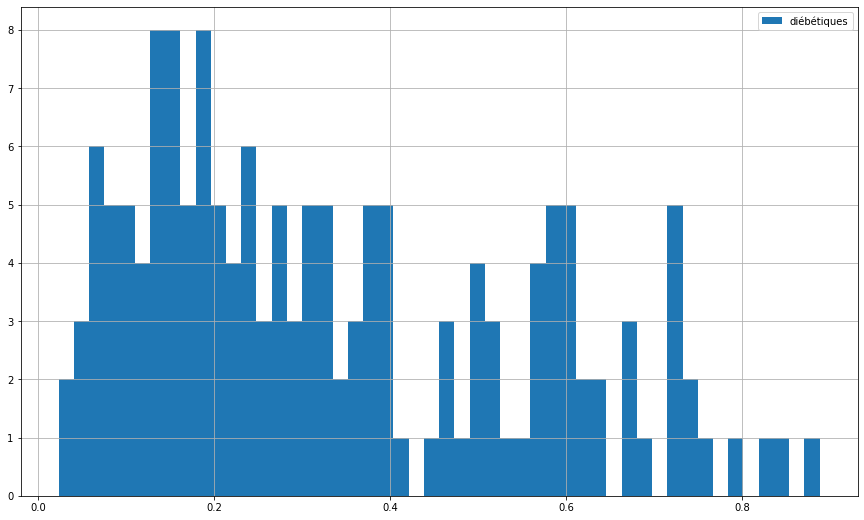

In [148]:
pd.Series(ypred_proba[:,1]).hist(figsize=(15,9),bins=50,label='diébétiques')
plt.legend()

In [49]:
from sklearn.preprocessing import binarize

In [50]:
ypred_bin=binarize(ypred_proba,threshold=0.5)

In [52]:
ypred_bin[:,-1] #c'est la colonne des diabétiques
#cela permet de voir la reg logistique fonctionner avec un seuil à O.5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [53]:
#si on change le seuil
ypred_bin=binarize(ypred_proba,threshold=0.2)

In [54]:
ypred_bin[:,-1]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1.])

In [56]:
#et donc une matrice de confusion
confusion_matrix(ytest,ypred_bin[:,1],labels=[0,1])

array([[52, 48],
       [ 4, 50]])

In [110]:
#la sensibilité ou le rappel est le ratio de personnes correctement labélisées diabétiques 
#sur toutes les personnes labélisées diabétiques
from sklearn.metrics import classification_report, precision_recall_curve

In [112]:
print(classification_report(ytest,ypred_bin[:,1],labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.52      0.67       100
           1       0.51      0.93      0.66        54

    accuracy                           0.66       154
   macro avg       0.72      0.72      0.66       154
weighted avg       0.78      0.66      0.66       154



In [64]:
from sklearn.metrics import roc_curve,roc_auc_score

In [81]:
#ratio de faux positif : tfp : personne incorrectement labélisées diabétiques/personnes n'ayant pas le diabète
#ratio de vrais positifs : tvp=sensitivity=recall: personne correctement labélisées diabétiques/personne ayant le diabète
#seuil =
tfp,tvp,seuil=roc_curve(ytest,ypred_proba[:,1],pos_label=0)


In [82]:
tfp

array([0.        , 0.01851852, 0.2037037 , 0.2037037 , 0.22222222,
       0.22222222, 0.27777778, 0.27777778, 0.33333333, 0.33333333,
       0.40740741, 0.40740741, 0.42592593, 0.42592593, 0.48148148,
       0.48148148, 0.51851852, 0.51851852, 0.55555556, 0.55555556,
       0.59259259, 0.59259259, 0.61111111, 0.61111111, 0.62962963,
       0.62962963, 0.64814815, 0.64814815, 0.7037037 , 0.7037037 ,
       0.72222222, 0.72222222, 0.74074074, 0.74074074, 0.75925926,
       0.75925926, 0.77777778, 0.77777778, 0.7962963 , 0.7962963 ,
       0.81481481, 0.81481481, 0.87037037, 0.87037037, 0.88888889,
       0.88888889, 0.90740741, 0.90740741, 0.92592593, 0.92592593,
       0.94444444, 0.94444444, 0.96296296, 0.96296296, 0.98148148,
       0.98148148, 1.        , 1.        ])

In [83]:
tvp

array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04,
       0.06, 0.06, 0.1 , 0.1 , 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.16,
       0.16, 0.19, 0.19, 0.2 , 0.2 , 0.21, 0.21, 0.23, 0.23, 0.24, 0.24,
       0.3 , 0.3 , 0.34, 0.34, 0.36, 0.36, 0.37, 0.37, 0.41, 0.41, 0.43,
       0.43, 0.44, 0.44, 0.45, 0.45, 0.51, 0.51, 0.59, 0.59, 0.64, 0.64,
       0.67, 0.67, 1.  ])

In [84]:
seuil

array([1.88824696, 0.88824696, 0.72059655, 0.71809165, 0.69416487,
       0.6794837 , 0.63625578, 0.63218206, 0.61120318, 0.61105383,
       0.59303982, 0.59020807, 0.58392195, 0.5707466 , 0.53795009,
       0.51767927, 0.49906189, 0.49547953, 0.49072541, 0.48969624,
       0.4719261 , 0.44575564, 0.41796339, 0.39287896, 0.39160646,
       0.38755502, 0.38198331, 0.37909487, 0.37093051, 0.35436793,
       0.35334498, 0.34248211, 0.33611892, 0.3125835 , 0.31124124,
       0.2998648 , 0.29866859, 0.27933289, 0.27867201, 0.27265258,
       0.27152376, 0.25061274, 0.23982444, 0.23784782, 0.23565912,
       0.22777354, 0.22442927, 0.21727496, 0.21652336, 0.19607481,
       0.19469878, 0.17691366, 0.17349673, 0.15709169, 0.15566235,
       0.14873118, 0.14690339, 0.02339386])

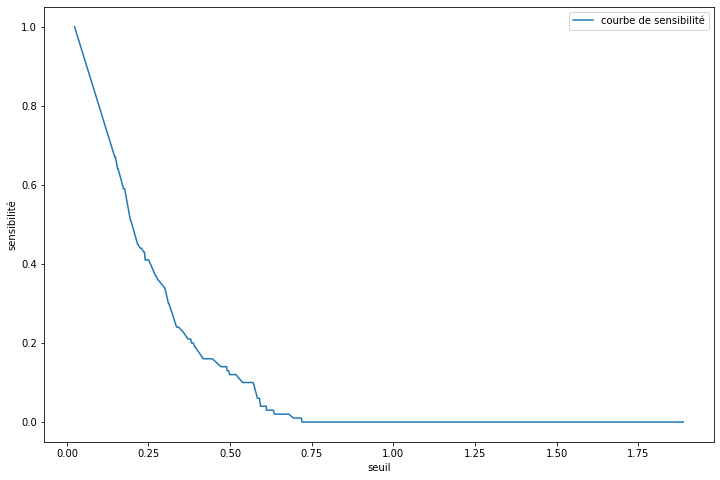

In [104]:
plt.figure(figsize=(12,8))
plt.plot(seuil,tvp,label='courbe de sensibilité')
plt.xlabel('seuil')
plt.ylabel('sensibilité')
plt.legend()
plt.show()

In [86]:
roc_auc_score(ytest,ypred_proba[:,1])

0.8251851851851851

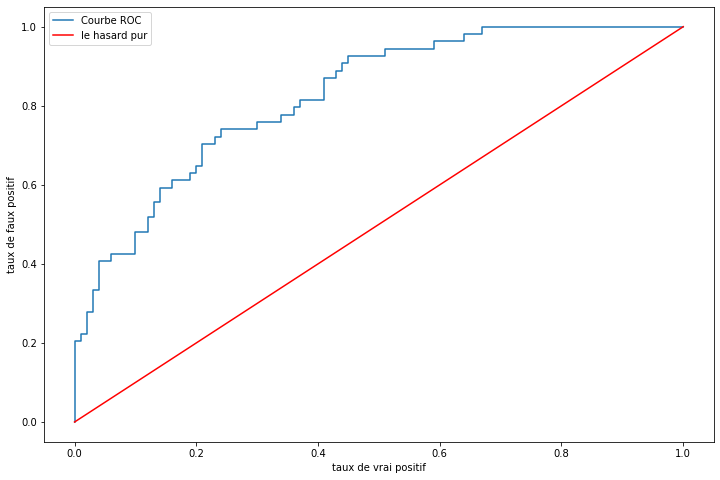

In [102]:
plt.figure(figsize=(12,8))
plt.plot(tvp,tfp,label='Courbe ROC')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1),c='red',label='le hasard pur')
plt.xlabel('taux de vrai positif')
plt.ylabel('taux de faux positif')
plt.legend()
plt.show()

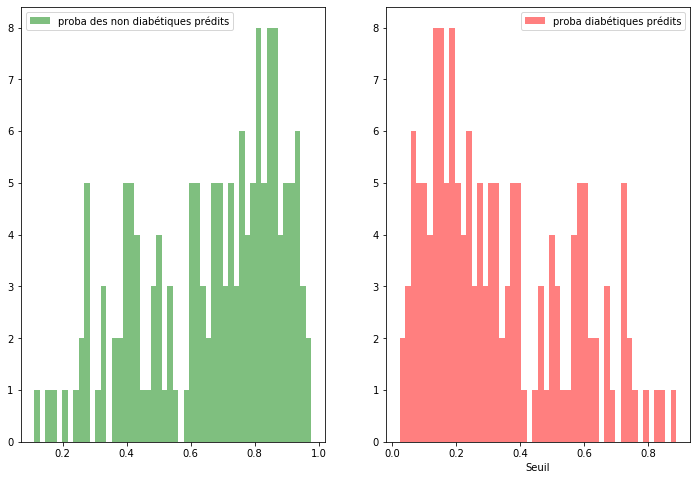

In [145]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.hist(ypred_proba[:,0],bins=50,color='green',label='proba des non diabétiques prédits',alpha=0.5)
plt.legend()
plt.subplot(122)
plt.hist(ypred_proba[:,1],bins=50,color='red',label='proba diabétiques prédits',alpha=0.5)
plt.xlabel('Seuil')
plt.legend()

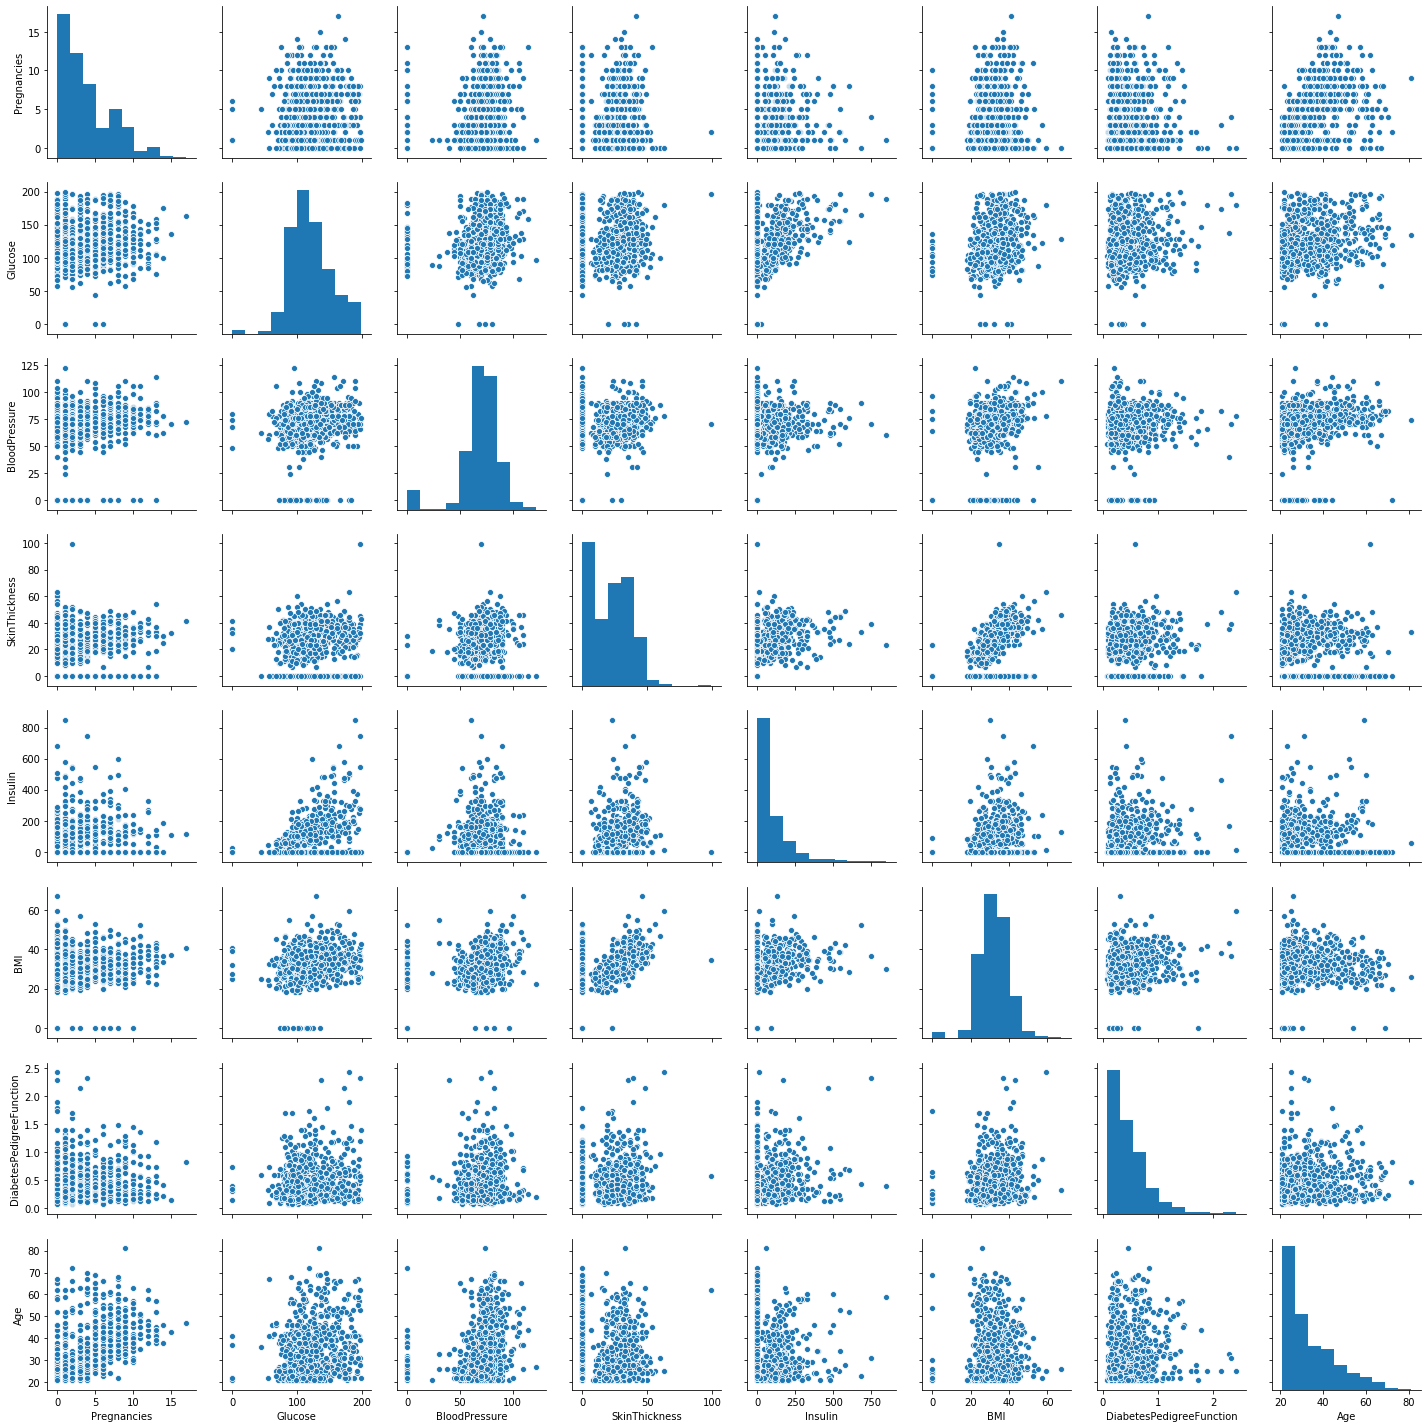

In [146]:
sns.pairplot(X)